## 1. Syntax

In [1]:
import pandas as pd

df = pd.DataFrame({"a" : [4 ,5, 6],
                   "b" : [7, 8, 9],
                   "c" : [10, 11, 12]},
                  index = [1, 2, 3])

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [19]:
df['a']
df[['a', 'b']]

,a,b
1,4,7
2,5,8
3,6,9


In [22]:
df.loc[2]

a     5
b     8
c    11
Name: 2, dtype: int64

In [23]:
df.loc[3, 'a']

6

In [26]:
df.loc[[1,3], ['a', 'b']]

,a,b
1,4,7
3,6,9


In [27]:
df2 = pd.DataFrame([[4, 7, 10],
                    [5, 8, 11],
                    [6, 9, 12]],
                    index=[1, 2, 3],
                    columns=['a', 'b', 'c'])

df2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [28]:
df = pd.DataFrame({"a" : [4 ,5, 6],
                   "b" : [7, 8, 9],
                   "c" : [10, 11, 12]},
                  index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)],
                                                    names=['n','v']))

df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## 2. Reshaping Data

In [30]:
# melt
pd.melt?

In [32]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [33]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [35]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [38]:
df = (pd.melt(df, value_vars=['A', 'B', 'C']).rename(columns={'variable' : 'var',
                                  'value' : 'val'}).query('val >= 200'))

df

TypeError: '>=' not supported between instances of 'str' and 'int'

In [61]:
#pivot table

pd.pivot?

In [62]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                            'two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [63]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [50]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [51]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                    columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [77]:
pd.concat([df1, df2])
#pd.concat([df1, df2], ignore_index=True)

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [79]:
pd.concat([df1, df2]).reset_index()

,index,letter,number
0,0,a,1
1,1,b,2
2,0,c,3
3,1,d,4


In [56]:
pd.concat([df1, df2], axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [65]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                            'two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [66]:
df.sort_values('zoo')

,foo,bar,baz,zoo
3,two,A,4,q
5,two,C,6,t
4,two,B,5,w
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z


In [68]:
df.sort_values('zoo', ascending=False)

,foo,bar,baz,zoo
2,one,C,3,z
1,one,B,2,y
0,one,A,1,x
4,two,B,5,w
5,two,C,6,t
3,two,A,4,q


In [70]:
df.rename(columns={'foo':'year'})

,year,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [75]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[25,36,29,12,235], columns=['data'])
df
df.sort_index()

,data
12,4
25,1
29,3
36,2
235,5


In [2]:
import numpy as np


In [6]:
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [8]:
df.drop(['b', 'c'], axis=1)

,a,d
0,0,3
1,4,7
2,8,11


In [9]:
df.drop(columns=['b', 'c'])

,a,d
0,0,3
1,4,7
2,8,11


In [10]:
df.drop(index=[0, 2])

,a,b,c,d
1,4,5,6,7


In [12]:
df.drop([0, 1])

,a,b,c,d
2,8,9,10,11


# 3. Subset Observations (Rows)

In [16]:
df = pd.DataFrame([[4, 7, 10],
                    [5, 8, 11],
                    [6, 9, 12]],
                    index=[1, 2, 3],
                    columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [19]:
df[df.b > 7]

,a,b,c
2,5,8,11
3,6,9,12


In [22]:
df = pd.DataFrame([[4, 7, 10],
                    [5, 8, 11],
                    [5, 8, 11]],
                    index=[1, 2, 3],
                    columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,5,8,11


In [23]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11


In [28]:
df = pd.DataFrame([[4, 7, 10],
                   [1, 4, 6],
                    [5, 8, 11],
                   [2, 8, 9],
                    [5, 8, 11], [3, 2, 5]],
                    columns=['a', 'b', 'c'])
df

,a,b,c
0,4,7,10
1,1,4,6
2,5,8,11
3,2,8,9
4,5,8,11
5,3,2,5


In [32]:
# row의 비율
df.sample(frac=0.8)

,a,b,c
2,5,8,11
5,3,2,5
0,4,7,10
1,1,4,6
3,2,8,9


In [34]:
# 무작위 추출
df.sample(n=2)

,a,b,c
4,5,8,11
1,1,4,6


In [35]:
df.iloc[2,1]

8

In [36]:
df.nlargest(3, 'c')

,a,b,c
2,5,8,11
4,5,8,11
0,4,7,10


In [37]:
df.nsmallest(2, 'b')

,a,b,c
5,3,2,5
1,1,4,6


# 4.Subset Variables (Columns)

In [ ]:
df = pd.DataFrame([[4, 7, 10],
                   [1, 4, 6],
                    [5, 8, 11],
                   [2, 8, 9],
                    [5, 8, 11], [3, 2, 5]],
                    columns=['a', 'b', 'c'])
df

In [39]:
df.filter(regex='b')


,b
0,7
1,4
2,8
3,8
4,8
5,2


In [44]:
df2 = df.rename(columns={'a':'app.le','b':'ban.ana','c':'carrot'})
df2

,app.le,ban.ana,carrot
0,4,7,10
1,1,4,6
2,5,8,11
3,2,8,9
4,5,8,11
5,3,2,5


In [45]:
df2.filter(regex='\.')

,app.le,ban.ana
0,4,7
1,1,4
2,5,8
3,2,8
4,5,8
5,3,2


In [47]:
df2.filter(regex='^ca')

,carrot
0,10
1,6
2,11
3,9
4,11
5,5


In [48]:
df2.filter(regex='^(?!carrot$).*')

,app.le,ban.ana
0,4,7
1,1,4
2,5,8
3,2,8
4,5,8
5,3,2


# 5. Summarize Data

In [49]:
df.value_counts?

In [50]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                    'num_wings': [2, 0, 0, 0]},
                   index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [51]:
df.value_counts()

num_legs  num_wings
4         0            2
2         2            1
6         0            1
dtype: int64

In [53]:
# len
len(df)

4

In [55]:
# unique
df['num_legs'].unique

<bound method Series.unique of falcon    2
dog       4
cat       4
ant       6
Name: num_legs, dtype: int64>

In [57]:
df.describe()

,num_legs,num_wings
count,4.000000,4.0
mean,4.000000,0.5
std,1.632993,1.0
min,2.000000,0.0
25%,3.500000,0.0
50%,4.000000,0.0
75%,4.500000,0.5
max,6.000000,2.0


In [65]:
df.quantile([0.25,0.5, 0.75])

,num_legs,num_wings
0.25,3.5,0.0
0.50,4.0,0.0
0.75,4.5,0.5


In [68]:
def add(x):
    return x+2

df['num_wings2'] = df['num_wings'].apply(add)
df

,num_legs,num_wings,num_wings2
falcon,2,2,4
dog,4,0,2
cat,4,0,2
ant,6,0,2


# 6. Make New Columns

In [69]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                    'num_wings': [2, 0, 0, 0]},
                   index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [73]:
df = df.assign(num_wings2=lambda df: df.num_wings+2)
df

,num_legs,num_wings,num_wings2
falcon,2,2,4
dog,4,0,2
cat,4,0,2
ant,6,0,2


In [75]:
df['num_legs2'] = df['num_legs'].apply(add)
df

,num_legs,num_wings,num_wings2,num_legs2
falcon,2,2,4,4
dog,4,0,2,6
cat,4,0,2,6
ant,6,0,2,8


In [76]:
pd.qcut(df.num_legs, 2, labels=False)

falcon    0
dog       0
cat       0
ant       1
Name: num_legs, dtype: int64

In [79]:
pd.qcut(df.num_legs, 2, labels=['a', 'b'])

falcon    a
dog       a
cat       a
ant       b
Name: num_legs, dtype: category
Categories (2, object): ['a' < 'b']

In [84]:
# clip: lower< 데이터 < upper사이의 숫자가 아니면 lower보다 낮은 데이터는 lower로
# upper보다 높은 데이터는 upper로 바꾼다.
맞춤
df.clip(lower=3,upper=5)

,num_legs,num_wings,num_wings2,num_legs2
falcon,3,3,4,4
dog,4,3,3,5
cat,4,3,3,5
ant,5,3,3,5


# 7. Group Data

In [92]:
df = pd.read_csv('강의자료/data2/house_price2.csv')
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


In [93]:
df.groupby(by='지역명').sum()

,연도,월,분양가격
지역명,,,
강원,534625,1740,620049
경기,534625,1740,1079257
경남,534625,1740,731738
경북,534625,1740,644514
광주,534625,1740,649443
대구,534625,1740,937814
대전,534625,1740,656971
부산,534625,1740,975179
서울,534625,1740,1914827


In [94]:
df.pivot_table(index='지역명', aggfunc=sum)

,분양가격,연도,월
지역명,,,
강원,620049,534625,1740
경기,1079257,534625,1740
경남,731738,534625,1740
경북,644514,534625,1740
광주,649443,534625,1740
대구,937814,534625,1740
대전,656971,534625,1740
부산,975179,534625,1740
서울,1914827,534625,1740


In [98]:
df2 = df.groupby(['지역명', '연도']).sum()
df2

월    분양가격
지역명 연도               
강원  2015  165   32673
    2016  390  112870
    2017  390  133070
    2018  390  149441
    2019  390  162445
...       ...     ...
충북  2016  390  129697
    2017  390  135683
    2018  390  148169
    2019  390  144925
    2020   15   24457

[102 rows x 2 columns]

In [99]:
df2.groupby(level='연도').sum()

,월,분양가격
연도,,
2015,2805,677656
2016,6630,2887302
2017,6630,3064729
2018,6630,3057468
2019,6630,3368401
2020,255,585802


In [104]:
df.size

22525

In [107]:
df.agg?

In [106]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9],
                    [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [116]:
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [119]:
#df.agg('mean', axis=0)
df.agg('mean', axis=1)

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

In [121]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                    "Col2": [13, 23, 18, 33, 48],
                    "Col3": [17, 27, 22, 37, 52]},
                   index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [130]:
# df.shift(1)
df.shift(-1)

,Col1,Col2,Col3
2020-01-01,20.0,23.0,27.0
2020-01-02,15.0,18.0,22.0
2020-01-03,30.0,33.0,37.0
2020-01-04,45.0,48.0,52.0
2020-01-05,NaN,NaN,NaN


In [132]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                    'spider', 'snake'],
                         'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [148]:
#df['Number_legs'].rank(method='dense') # 1위, 2위, 2위, 3위 
df['Number_legs'].rank(method='min')

0    2.0
1    1.0
2    2.0
3    3.0
4    NaN
Name: Number_legs, dtype: float64

In [151]:
#df.rank(pct=True)
df.rank(pct=False)

,Animal,Number_legs
0,1.0,2.5
1,3.0,1.0
2,2.0,2.5
3,5.0,4.0
4,4.0,NaN


In [153]:
df['Number_legs'].rank(method='first') # 동점일때 인덱스순서에 따라 순위 결정

0    2.0
1    1.0
2    3.0
3    4.0
4    NaN
Name: Number_legs, dtype: float64

In [158]:
df['Number_legs'].cumsum()

0     4.0
1     6.0
2    10.0
3    18.0
4     NaN
Name: Number_legs, dtype: float64

In [159]:
df['Number_legs'].cummax()

0    4.0
1    4.0
2    4.0
3    8.0
4    NaN
Name: Number_legs, dtype: float64

In [160]:
df['Number_legs'].cummin()

0    4.0
1    2.0
2    2.0
3    2.0
4    NaN
Name: Number_legs, dtype: float64

In [161]:
df['Number_legs'].cumprod() # cumulative:누적

0      4.0
1      8.0
2     32.0
3    256.0
4      NaN
Name: Number_legs, dtype: float64

# 8. Combine Data Sets

In [169]:
adf = pd.DataFrame({'x1': ['a','b','c'], 'x2':[1,2,3]})
adf

,x1,x2
0,a,1
1,b,2
2,c,3


In [176]:
bdf = pd.DataFrame({'x1': ['a','b','d'], 'x3':['t','f','t']})
bdf

,x1,x3
0,a,t
1,b,f
2,d,t


In [177]:
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,a,1,t
1,b,2,f
2,c,3,NaN


In [178]:
pd.merge(adf, bdf, how='right', on='x1') # NaN값을 채워줌


,x1,x2,x3
0,a,1.0,t
1,b,2.0,f
2,d,NaN,t


In [179]:
pd.merge(adf, bdf, how='inner', on='x1')


,x1,x2,x3
0,a,1,t
1,b,2,f


In [180]:
pd.merge(adf, bdf, how='outer', on='x1')


,x1,x2,x3
0,a,1.0,t
1,b,2.0,f
2,c,3.0,NaN
3,d,NaN,t


In [181]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,a,1
1,b,2


In [182]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,c,3


In [183]:
ydf = pd.DataFrame({'x1': ['a','b','c'], 'x2':[1,2,3]})
ydf

,x1,x2
0,a,1
1,b,2
2,c,3


In [184]:
zdf = pd.DataFrame({'x1': ['b','c','d'], 'x2':[2,3,4]})
zdf

,x1,x2
0,b,2
1,c,3
2,d,4


In [185]:
pd.merge(ydf, zdf)

,x1,x2
0,b,2
1,c,3


In [188]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,a,1
1,b,2
2,c,3
3,d,4


In [187]:
pd.merge(ydf, zdf, how='outer', indicator=True) # 병합상태


,x1,x2,_merge
0,a,1,left_only
1,b,2,both
2,c,3,both
3,d,4,right_only


In [190]:
pd.merge(ydf, zdf, how='outer',indicator=True).query('_merge == "left_only"')

,x1,x2,_merge
0,a,1,left_only


In [192]:
pd.merge(ydf, zdf, how='outer',
        indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])


,x1,x2
0,a,1


# 9. Handling Missing Data

In [194]:
df3 = pd.merge(adf, bdf, how='outer', on='x1')
df3

,x1,x2,x3
0,a,1.0,t
1,b,2.0,f
2,c,3.0,NaN
3,d,NaN,t


In [195]:
df3.dropna()

,x1,x2,x3
0,a,1.0,t
1,b,2.0,f


In [196]:
df3.fillna(1000)

,x1,x2,x3
0,a,1.0,t
1,b,2.0,f
2,c,3.0,1000
3,d,1000.0,t


# 10. Windows

In [200]:
import numpy as np

In [201]:
df = pd.DataFrame({'data':np.random.randn(100)},
                  index=pd.date_range('1/1/2021', periods=100))
df


,data
2021-01-01,1.115188
2021-01-02,0.965541
2021-01-03,1.423266
2021-01-04,1.490664
2021-01-05,1.411628
...,...
2021-04-06,-0.663486
2021-04-07,-1.852363
2021-04-08,-0.521661
2021-04-09,-0.640521


<AxesSubplot:>

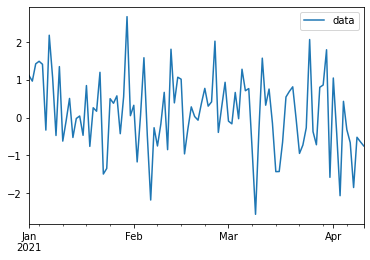

In [202]:
df.plot()

<AxesSubplot:>

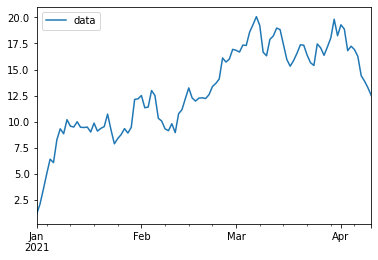

In [210]:
df.cumsum().plot()

<AxesSubplot:>

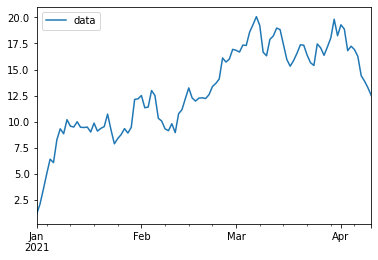

In [213]:
df.expanding().sum().plot()

In [216]:
df.expanding(3).sum()

,data
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,3.503995
2021-01-04,4.994659
2021-01-05,6.406286
...,...
2021-04-06,16.250454
2021-04-07,14.398091
2021-04-08,13.876430
2021-04-09,13.235909


In [217]:
df2 = pd.DataFrame({'data':[0,1,2,np.nan, 4]})
df2

,data
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [218]:
df2.expanding(2).sum()

,data
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


In [219]:
# 
df2.rolling(2).sum()

,data
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN
